## Installing packages (for getting data, drawing maps and processing the data)

In [1]:
!pip install lxml
!pip install bs4
import lxml as lx
import pandas as pd
import requests
from bs4 import BeautifulSoup

     |████████████████████████████████| 5.5MB 19.4MB/s eta 0:00:01
     |████████████████████████████████| 122kB 6.4MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4


## Importing the London csv file and getting the coordinates of London from the file

In [2]:
#Getting the data
import pandas 
# reading the CSV file 
df1 = pandas.read_csv('london.csv')
# displaying the contents of the CSV file 
print(df1.shape)
print('Average of Latitude is ',df1['Average of Latitude'].mean())
print('Average of Longtitude is ',df1['Average of Longitude'].mean())
df1.head()

(638, 8)
Average of Latitude is  51.50471482865204
Average of Longtitude is  -0.12153232594670846


,Ward,Sum of Population,Sum of Households,Sum of Altitude,Average of Index of Multiple Deprivation,Average of Distance to station,Average of Latitude,Average of Longitude
0,Abbey,23016,9115,5623,15351.470320,0.359000,51.476602,-0.058257
1,Abbey Road,11091,5174,15292,24245.784620,0.348642,51.534391,-0.178132
2,Abbey Wood,15684,5958,2126,8847.297398,0.660415,51.490936,0.113496
3,Abingdon,9644,4672,4488,22257.260610,0.467441,51.497355,-0.196444
4,Acton Central,15424,6266,8417,12478.505450,0.383761,51.513191,-0.269339


## Comparing the coordinates with Geopy coordinates of London

In [3]:
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

address = 'London'
geolocator = Nominatim(user_agent="London_Explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

     |████████████████████████████████| 112kB 6.3MB/s eta 0:00:01
The geograpical coordinate of London are 51.5073219, -0.1276474.


#### We see that the averaged coordinates in our csv file are very similar to the ones gotten from geopy
#### Averaged Coordinates : 51.504,-0.1215
#### Geopy Coordinates : 51.507, -0.1276

## Plotting London by the Ward Coordinates

In [4]:
import folium # map rendering library
map_london = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df1['Average of Latitude'], df1['Average of Longitude'], df1['Ward']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

## Let's draw the Ward level Graphs

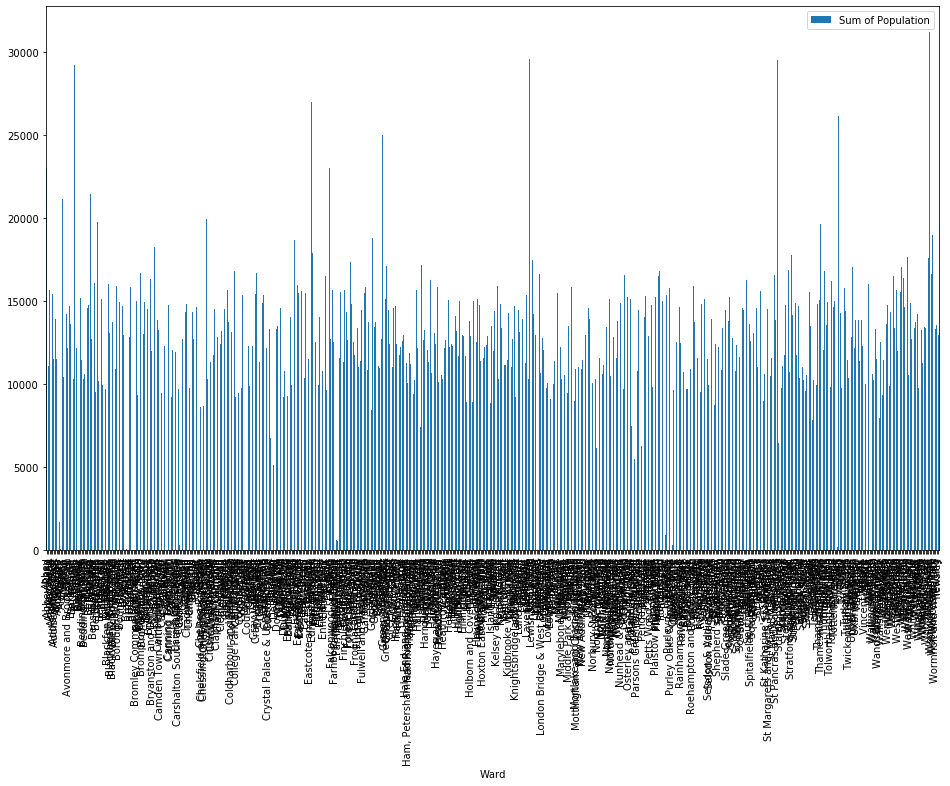

In [5]:
import matplotlib.pyplot as plot
#df56.sort_values('Sum of Population', inplace = True)
df1.plot(x="Ward", y=["Sum of Population"], rot=90,figsize = (16,10), kind="bar")
#df56.plot(x="District", y=["Count of Postcodes"], figsize = (8,6), kind="bar")
#df56.plot.bar(x="District", y='Sum of Population', y = 'Sum of Households',width=0.2, color='b', align='center')
#df66.plot.bar(x="District", y='Sum of Households', width=0.2, color='g', align='center')
plot.show(block=True);

#### It's pretty crowded as there are over 638 wards.. So let's do EDA on Dsitricts rather (of which only 32 are there)

### Getting district level data also, for some EDA

In [6]:
wdm = pandas.read_csv('ward_district_mapping.csv')
df10 = pandas.merge(df1, wdm, on=['Ward'])
inc = pandas.read_csv('income.csv')
df100 = pandas.merge(df10, inc, on=['Ward'])
df100.head()
df101 = pandas.merge(df10, inc, on=['Ward'])
df101.head()

,Ward,Sum of Population,Sum of Households,Sum of Altitude,Average of Index of Multiple Deprivation,Average of Distance to station,Average of Latitude,Average of Longitude,District,Average of Income,Count of Postcodes
0,Abbey,23016,9115,5623,15351.470320,0.359000,51.476602,-0.058257,Barking and Dagenham,58431.05023,438.0
1,Abbey,23016,9115,5623,15351.470320,0.359000,51.476602,-0.058257,Merton,58431.05023,438.0
2,Abbey Road,11091,5174,15292,24245.784620,0.348642,51.534391,-0.178132,Westminster,58690.76923,325.0
3,Abbey Wood,15684,5958,2126,8847.297398,0.660415,51.490936,0.113496,Greenwich,44023.42007,269.0
4,Abingdon,9644,4672,4488,22257.260610,0.467441,51.497355,-0.196444,Kensington and Chelsea,66320.00000,330.0


#### Lets draw the District wise graphs of the basic metrics

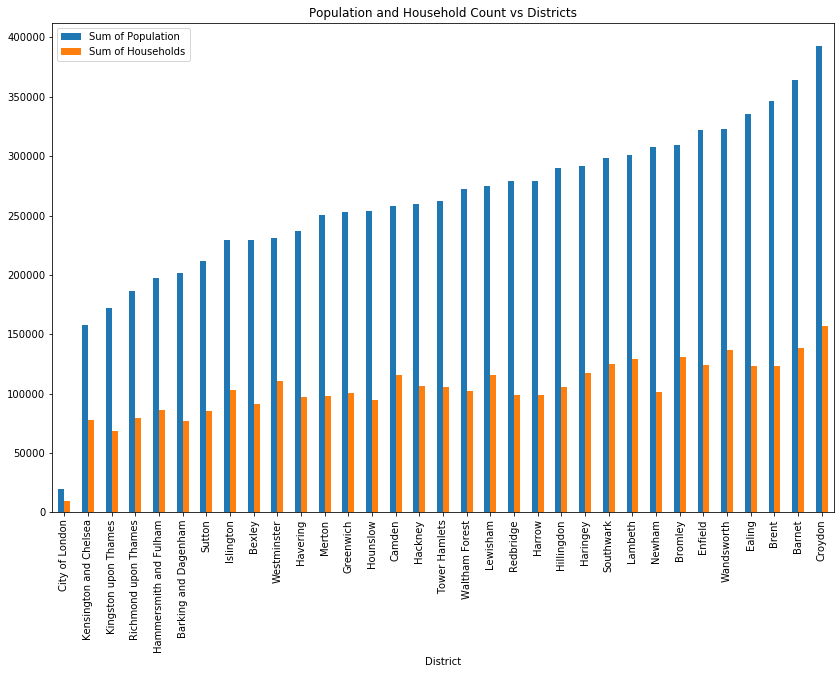

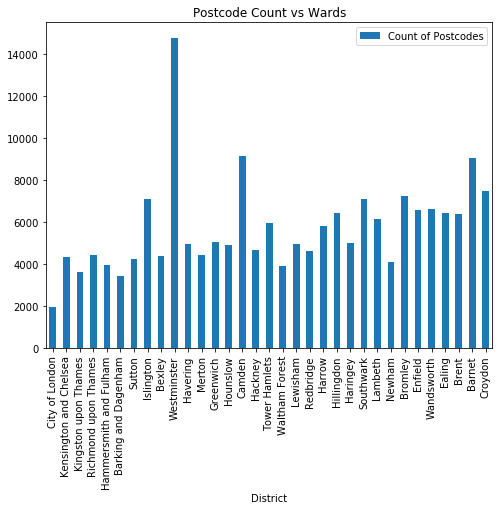

In [7]:
df56= df101[['Sum of Population', 'Sum of Households', 'Count of Postcodes', 'District']].groupby('District', as_index=False).sum()
import matplotlib.pyplot as plot
df56.sort_values('Sum of Population', inplace = True)
df56.plot(x="District", y=["Sum of Population", "Sum of Households"], figsize = (14,9), kind="bar", title='Population and Household Count vs Districts')
df56.plot(x="District", y=["Count of Postcodes"], figsize = (8,6), kind="bar", title='Postcode Count vs Wards')
#df56.plot.bar(x="District", y='Sum of Population', y = 'Sum of Households',width=0.2, color='b', align='center')
#df66.plot.bar(x="District", y='Sum of Households', width=0.2, color='g', align='center')
plot.show(block=True);

#### Population and Households are pretty well correlated, with values ranging from 150,000 to 390,000 for population
#### Count of Postcodes though doens't have a very good correlation with the the other two metrics

## Let's create some graphs for Index of Multiple Deprivation and Income as well as Distance to Station

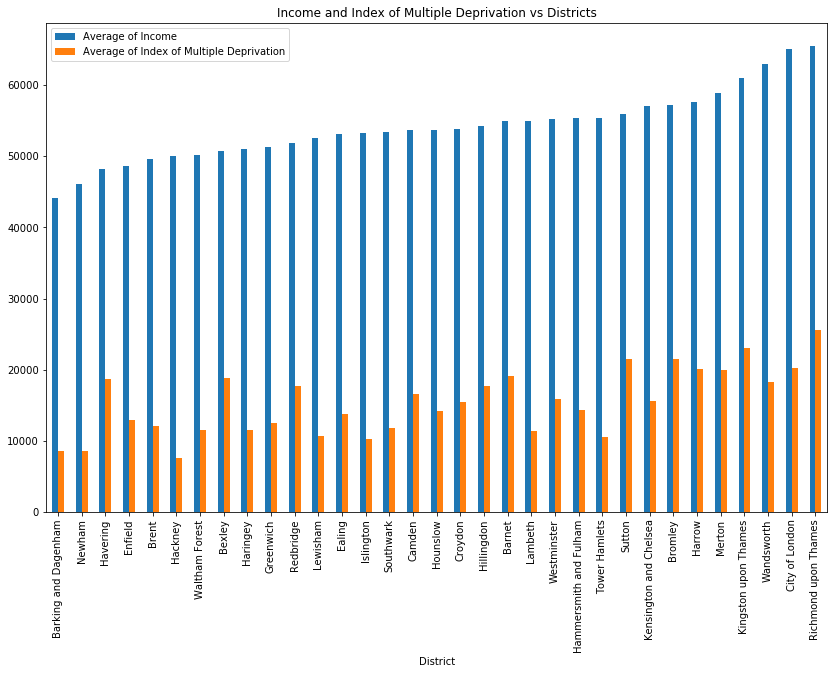

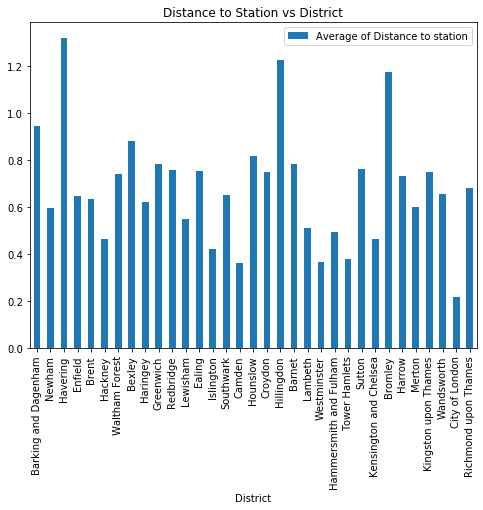

In [8]:
df46= df101[['Average of Distance to station','Average of Index of Multiple Deprivation', 'Average of Income', 'District']].groupby('District', as_index=False).mean()
import matplotlib.pyplot as plot
df46.sort_values('Average of Income', inplace = True)
df46.plot(x="District", y=["Average of Income", "Average of Index of Multiple Deprivation"], figsize = (14,9), kind="bar", title='Income and Index of Multiple Deprivation vs Districts')
df46.plot(x="District", y=['Average of Distance to station'], figsize = (8,6), kind="bar", title='Distance to Station vs District')
#df66.plot.bar(x="District", y='Sum of Population', y = 'Sum of Households',width=0.2, color='b', align='center')
#df66.plot.bar(x="District", y='Sum of Households', width=0.2, color='g', align='center')
plot.show(block=True);

#### Although fair but still weaker than the correlation between Population and Households is the correlation between Index of Multiple Deprivations and Income
#### Distance to station isn't correlated with any measure and we can thus take it as an independent variable
#### Out of Households and Population, I will take Population and Income out of Income and Index of Multiple Deprivation

## Getting the correlation values just to confirm our above conclusions

In [9]:
#Getting correlation between income and index of multiple deprivation as well as population and household count
import numpy as np
print(np.corrcoef(df101['Sum of Population'], df101['Sum of Households']))
print(np.corrcoef(df101['Sum of Population'], df101['Count of Postcodes']))

print(np.corrcoef(df101['Average of Income'],df101['Average of Index of Multiple Deprivation']))
print(np.corrcoef(df101['Average of Income'],df101['Average of Distance to station']))
print(np.corrcoef(df101['Sum of Population'], df101['Average of Distance to station']))


[[1.         0.93531015]
 [0.93531015 1.        ]]
[[1.        0.3204964]
 [0.3204964 1.       ]]
[[1.         0.79266367]
 [0.79266367 1.        ]]
[[ 1.         -0.20129868]
 [-0.20129868  1.        ]]
[[1.         0.07777354]
 [0.07777354 1.        ]]


#### Thus we keep Sum of Population, Average of Income and Average of distance to Station

## Getting a graph of Standard Deviation between the wards of each district. This will help in knowing districts where wards are very different from each other

In [10]:
#df101.to_csv("df101.csv")
#Within a district, getting mean and standard deviation of the important metrics (above mentioned four)
df101[df101.columns[1:4]] =df101[df101.columns[1:4]].astype('float64')
#df101.dtypes
df36 = df101[['Average of Distance to station','Sum of Population', 'Average of Income', 'District']].groupby('District').std().reset_index()
#import matplotlib.pyplot as plot
df36.sort_values('Average of Income', inplace = True)
df36.columns =['District', 'Stddev of Distance to Station', 'Stddev of Population', 'Stddev of Income'] 

# Merging std dev and mean of income and distance to station, (leaving population as that was summed rather than averaged initially)
df81 = pandas.merge(df46[['District', 'Average of Distance to station', 'Average of Income']], df36[['District','Stddev of Distance to Station', 'Stddev of Income']], on =['District'])
#df100 = pandas.merge(df10, inc, on=['Ward'])
df81['Stddev % of Mean : DTS'] = df81['Stddev of Distance to Station']/df81['Average of Distance to station']
df81['Stddev % of Mean : Income'] = df81['Stddev of Income']/df81['Average of Income']
#df81.iloc [:, [1, 2]]

print(df81.iloc[:,[5,6]].mean())

Stddev % of Mean : DTS       0.412903
Stddev % of Mean : Income    0.110086
dtype: float64


#### Distance to Station has much larger variation within its wards than has Income

## Entering Foursquare Credentials (and using Foursquare to get location data)

In [11]:
CLIENT_ID = 'MAAYVXJ52QE1JYSBWMI2GNG1LFGY3C1VX2EDYN0JK5OIYPES' # your Foursquare ID
CLIENT_SECRET = '1V4MMEQNBSIJHPJIR5OXSSVAZFQMCDA2CNPWN04EC0FDM32V' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('abhaysinghsaini@gmail.com:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

LIMIT = 100
radius = 500

abhaysinghsaini@gmail.com:
CLIENT_ID: MAAYVXJ52QE1JYSBWMI2GNG1LFGY3C1VX2EDYN0JK5OIYPES
CLIENT_SECRET:1V4MMEQNBSIJHPJIR5OXSSVAZFQMCDA2CNPWN04EC0FDM32V


#### Defining the function to get the common venues within a ward

In [12]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Name',
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Dividing the dataframe into multiple parts so that we can bypass the daily limitations of the Foursquare calls

In [13]:
df11 = df1.iloc[0:150]
df12 = df1.iloc[150:350]
df13 = df1.iloc[350:500]
df14 = df1.iloc[500:638]
#df15 = df1.iloc[600:638]
print('df11s shape', df11.shape)
print(' df12s shape', df12.shape)
print(' df13s shape', df13.shape)
print(' df14s shape', df14.shape)
#print(' df15s shape', df15.shape)

df11s shape (150, 8)
 df12s shape (200, 8)
 df13s shape (150, 8)
 df14s shape (138, 8)


#### Getting the venue data in four separate dataframes

In [14]:
#Since for a free account we don't get a lot of calls, dividing the dataset into different parts

london_venues1 = getNearbyVenues(names=df11['Ward'],
                                   latitudes=df11['Average of Latitude'],
                                 longitudes=df11['Average of Longitude']
                                 )
print('1st part done')
london_venues2 = getNearbyVenues(names=df12['Ward'],
                                   latitudes=df12['Average of Latitude'],
                                  longitudes=df12['Average of Longitude']
                                 )
print('2nd part done')
london_venues3= getNearbyVenues(names=df13['Ward'],
                                   latitudes=df13['Average of Latitude'],
                                  longitudes=df13['Average of Longitude']
                                 )
print('3rd part done')
london_venues4 = getNearbyVenues(names=df14['Ward'],
                                   latitudes=df14['Average of Latitude'],
                                 longitudes=df14['Average of Longitude']
                                 )
print('4th part done')


1st part done
2nd part done
3rd part done
4th part done


#### Putting the data into CSVs for later use

In [ ]:
#london_venues1.to_csv("part1.csv")
#london_venues2.to_csv("part2.csv")
#london_venues3.to_csv("part3.csv")
#london_venues4.to_csv("part4.csv")

#### Reading the informatino back from the CSVs

In [14]:
London_venues1 = pd.read_csv('part1.csv',index_col=0)
London_venues2 = pd.read_csv('part2.csv',index_col=0)
London_venues3 = pd.read_csv('part3.csv',index_col=0)
London_venues4 = pd.read_csv('part4.csv',index_col=0)
frames = [London_venues1, London_venues2, London_venues3, London_venues4]
df2 = pd.concat(frames)
df2.reset_index(inplace=True, drop=True)
df2

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Name,Venue Latitude,Venue Longitude,Venue Category
0,Abbey,51.476602,-0.058257,Peckham Beer Rebellion,53f090cc498efa32861162a0,51.473612,-0.058636,Pub
1,Abbey,51.476602,-0.058257,Asylum Chapel,4e33163a227111ae768a86e0,51.479295,-0.060841,Art Gallery
2,Abbey,51.476602,-0.058257,Kudu,5a63310ca92d9807679ec024,51.473889,-0.059369,African Restaurant
3,Abbey,51.476602,-0.058257,Blackbird Bakery,53ea3ffd498e4b67a5a58878,51.473496,-0.057418,Bakery
4,Abbey,51.476602,-0.058257,Mamma Dough,573e14fc498e9c65d3550854,51.473456,-0.056323,Pizza Place
...,...,...,...,...,...,...,...,...
13265,Yeading,51.524316,-0.390686,B&Q,4bceead6ef109521d4bf8486,51.522648,-0.387927,Hardware Store
13266,Yeading,51.524316,-0.390686,Tesco Extra,4ba49d59f964a52081a738e3,51.524666,-0.385670,Supermarket
13267,Yeading,51.524316,-0.390686,Atlantis Fish & Chips,4e1c9a63b0fb543b8ff59212,51.525862,-0.384997,Seafood Restaurant
13268,Yiewsley,51.516236,-0.466221,Sea Life,502ac93de4b0b4f96235626d,51.516240,-0.472691,Fish & Chips Shop


#### Filtering for only Restaurants and eating places in the venues and counting number of unique venue categories
#### Also, note that we read a csv where i have manually entered a "Super Category" of restaurants, classifying the venue into 6 separate categories 

In [15]:
Super_Category = pd.read_csv('Super_Category.csv')
Super_Category

,Super Category,Venue Category
0,Anglo American,Restaurant
1,African,African Restaurant
2,Anglo American,Pizza Place
3,Asian,Chinese Restaurant
4,Middle Eastern,Middle Eastern Restaurant
...,...,...
95,Continental European,Italian Restaurant
96,Anglo American,Cafeteria
97,Anglo American,Burger Joint
98,Continental European,Portuguese Restaurant


In [16]:
len(df2['Venue Category'].unique())
# Filtering only restaurant venue categories
Restaurant_String = ('Restaurant', 'African Restaurant', 'Pizza Place', 'Chinese Restaurant', 'Middle Eastern Restaurant', 'Persian Restaurant', 'French Restaurant', 'Indian Restaurant', 'Breakfast Spot', 'Mediterranean Restaurant', 'Sushi Restaurant', 'Thai Restaurant', 'Japanese Restaurant', 'Fast Food Restaurant', 'Filipino Restaurant', 'Lebanese Restaurant', 'Asian Restaurant', 'South Indian Restaurant', 'Bed & Breakfast', 'Tapas Restaurant', 'Turkish Restaurant', 'English Restaurant', 'Falafel Restaurant', 'Colombian Restaurant', 'Szechuan Restaurant', 'Argentinian Restaurant', 'South American Restaurant', 'Seafood Restaurant', 'Cantonese Restaurant', 'Mexican Restaurant', 'Kebab Restaurant', 'Malay Restaurant', 'Moroccan Restaurant', 'Vietnamese Restaurant', 'Hunan Restaurant', 'Vegetarian / Vegan Restaurant', 'Ethiopian Restaurant', 'Korean Restaurant', 'Food Truck', 'Latin American Restaurant', 'New American Restaurant', 'Greek Restaurant','Peruvian Restaurant', 'Australian Restaurant', 'Udon Restaurant', 'Austrian Restaurant', 'Brazilian Restaurant', 'Israeli Restaurant', 'Ramen Restaurant', 'Caribbean Restaurant', 'Sri Lankan Restaurant', 'Eastern European Restaurant', 'American Restaurant', 'Street Food Gathering', 'Spanish Restaurant', 'German Restaurant', 'Soup Place', 'Fried Chicken Joint', 'Dosa Place', 'Dim Sum Restaurant', 'Sandwich Place', 'BBQ Joint', 'Czech Restaurant', 'Churrascaria', 'Pakistani Restaurant', 'Gluten-free Restaurant', 'Dumpling Restaurant', 'Halal Restaurant', 'Afghan Restaurant', 'Belgian Restaurant', 'Iraqi Restaurant', 'Molecular Gastronomy Restaurant', 'Bulgarian Restaurant', 'Russian Restaurant', 'Shaanxi Restaurant', 'Theme Restaurant', 'North Indian Restaurant', 'Grilled Meat Restaurant', 'Doner Restaurant', 'Scottish Restaurant', 'Xinjiang Restaurant', 'Currywurst Joint', 'Indian Chinese Restaurant', 'Indonesian Restaurant', 'Polish Restaurant', 'Wings Joint', 'Yakitori Restaurant', 'Okonomiyaki Restaurant', 'Taco Place', 'Snack Place', 'Noodle House', 'Comfort Food Restaurant', 'Cajun / Creole Restaurant', 'Cuban Restaurant', 'Modern European Restaurant', 'Italian Restaurant', 'Cafeteria', 'Burger Joint', 'Portuguese Restaurant','Diner')
df3 = df2[df2['Venue Category'].isin(Restaurant_String)]
print('After Filtering, Number of Venue Categories in New Dataframe :-', len(df3['Venue Category'].unique()))
print('After Filtering, Number of Neighborhoods in New Dataframe :-', len(df3['Neighborhood'].unique()))
print('After Filtering, Number of Venue Names in New Dataframe :-', len(df3['Venue'].unique()))
print('After Filtering, Number of Venue IDs in New Dataframe :-', len(df3['Venue Name'].unique()))
# Reading Super Category file and Joining the dataframe df3 with Super Category File
Super_Category = pd.read_csv('Super_Category.csv')
Super_Category
df31 = pd.merge(df3, Super_Category, on='Venue Category')
df31

After Filtering, Number of Venue Categories in New Dataframe :- 100
After Filtering, Number of Neighborhoods in New Dataframe :- 499
After Filtering, Number of Venue Names in New Dataframe :- 2465
After Filtering, Number of Venue IDs in New Dataframe :- 3176


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Name,Venue Latitude,Venue Longitude,Venue Category,Super Category
0,Abbey,51.476602,-0.058257,Kudu,5a63310ca92d9807679ec024,51.473889,-0.059369,African Restaurant,African
1,Abbey,51.476602,-0.058257,805 Restaurants,4b1292b8f964a520f18a23e3,51.479774,-0.056991,African Restaurant,African
2,Bayswater,51.516544,-0.192388,Couscous Cafe,4bb108e8f964a52088743ce3,51.513730,-0.187969,African Restaurant,African
3,Clerkenwell,51.524967,-0.110137,Spinach & Agushi,4acdd935f964a5203ccd20e3,51.525288,-0.110348,African Restaurant,African
4,Coldharbour,51.463487,-0.109278,Asmara,4ad0eb0cf964a52018db20e3,51.461831,-0.112229,African Restaurant,African
...,...,...,...,...,...,...,...,...,...
3930,Vincent Square,51.493437,-0.133986,Preto,4be2fdd1b02ec9b61f404ec0,51.492846,-0.140658,Churrascaria,Continental European
3931,Warwick,51.491491,-0.143227,Preto,4be2fdd1b02ec9b61f404ec0,51.492846,-0.140658,Churrascaria,Continental European
3932,Warwick,51.491491,-0.143227,Boisdale of Belgravia,4ac518d9f964a520bda820e3,51.494350,-0.148055,Scottish Restaurant,Continental European
3933,West Hampstead,51.548811,-0.191988,Czech & Slovak Bar & Restaurant,4bb4f56a0ef1c9b6daabf412,51.544840,-0.191697,Czech Restaurant,Continental European


#### Getting statistical information about the neighborhoods

In [17]:
import numpy as np
tva = df31[['Venue Category','Neighborhood']].groupby(['Neighborhood']).agg(['count'])
#type(tva)
#tva.columns
#type(tva[('Venue', 'count')])
#tva[('Venue', 'count')].to_numpy()
#print(tva[('Venue','count')])
print('Average Venue Categories in a Neighborhood', tva.mean())
print('Median Venue Categories in a Neighborhood', tva.median())
#tva.mean()
print('Number of Unique Venue Categories',len(df31['Venue Category'].unique()))
#toronto_venues['Venue Category'].unique()
print('Number of Neighborhoods for which a venue was found',len(df31['Neighborhood'].unique()))

Average Venue Categories in a Neighborhood Venue Category  count    7.885772
dtype: float64
Median Venue Categories in a Neighborhood Venue Category  count    4.0
dtype: float64
Number of Unique Venue Categories 100
Number of Neighborhoods for which a venue was found 499


## One Hot Encoding of the Venue Data

In [18]:
london_onehot = pd.get_dummies(df31[['Super Category']], prefix="", prefix_sep="")
#london_onehot.rename(columns={'Neighborhood': 'Neighborhood1'}, inplace=True)
# add neighborhood column back to dataframe
london_onehot['Neighborhood'] = df31['Neighborhood']
# move neighborhood column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]
#london_onehot.to_csv('New_London_Onehot.csv')
london_onehot

,Neighborhood,African,Anglo American,Asian,Continental European,Latin American,Middle Eastern,South Asian
0,Abbey,1,0,0,0,0,0,0
1,Abbey,1,0,0,0,0,0,0
2,Bayswater,1,0,0,0,0,0,0
3,Clerkenwell,1,0,0,0,0,0,0
4,Coldharbour,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
3930,Vincent Square,0,0,0,1,0,0,0
3931,Warwick,0,0,0,1,0,0,0
3932,Warwick,0,0,0,1,0,0,0
3933,West Hampstead,0,0,0,1,0,0,0


In [19]:
london_onehot.shape

(3935, 8)

#### Averaging the counts of each type of restaurant for each neighborhood

In [20]:
london_grouped = london_onehot.groupby('Neighborhood').mean().reset_index()
london_grouped.head()

,Neighborhood,African,Anglo American,Asian,Continental European,Latin American,Middle Eastern,South Asian
0,Abbey,0.4,0.400000,0.200000,0.000000,0.0,0.000000,0.000000
1,Abbey Road,0.0,0.333333,0.000000,0.166667,0.0,0.500000,0.000000
2,Abbey Wood,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
3,Abingdon,0.0,0.346154,0.230769,0.230769,0.0,0.153846,0.038462
4,Acton Central,0.0,0.666667,0.000000,0.000000,0.0,0.000000,0.333333


In [21]:
london_grouped.shape

(499, 8)

#### Merging the population, income and station distance data to the restaurant category data

In [22]:
df1.columns =['Neighborhood', 'Sum of Population','Sum of Households','Sum of Altitude','Average of Index of Multiple Deprivation','Average of Distance to station','Average of Latitude','Average of Longitude'] 
london_grouped_1 = pd.merge(london_grouped, df1[['Neighborhood','Sum of Population', 'Average of Distance to station']], on=['Neighborhood'])
#london_grouped_1
inc.columns = ['Neighborhood','Average of income','Count of Postcodes']
London_grouped_2 = pd.merge(london_grouped_1,inc[['Neighborhood','Average of income']], on=['Neighborhood'])
London_grouped_2

,Neighborhood,African,Anglo American,Asian,Continental European,Latin American,Middle Eastern,South Asian,Sum of Population,Average of Distance to station,Average of income
0,Abbey,0.4,0.400000,0.200000,0.000000,0.0,0.000000,0.000000,23016,0.359000,58431.05023
1,Abbey Road,0.0,0.333333,0.000000,0.166667,0.0,0.500000,0.000000,11091,0.348642,58690.76923
2,Abbey Wood,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,15684,0.660415,44023.42007
3,Abingdon,0.0,0.346154,0.230769,0.230769,0.0,0.153846,0.038462,9644,0.467441,66320.00000
4,Acton Central,0.0,0.666667,0.000000,0.000000,0.0,0.000000,0.333333,15424,0.383761,51656.00000
...,...,...,...,...,...,...,...,...,...,...,...
494,Woolwich Common,0.0,0.000000,0.333333,0.000000,0.0,0.333333,0.333333,16641,0.853287,42761.16505
495,Woolwich Riverside,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,18970,0.395885,49334.09091
496,Worcester Park,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,11605,0.914041,59000.00000
497,Wormholt and White City,0.0,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,13294,0.672493,48223.56322


#### Getting likes of users at those particular venues (new location data data point from foursquare)

In [ ]:
#practice
list_likes = []
for i in range(3176):
    venue_id = pd.Series(df31['Venue Name'].unique())[i]
    print(i)
     # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/{}/likes?&client_id={}&client_secret={}&v={}&radius={}&limit={}'.format(
    venue_id,
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    radius, 
    LIMIT)
    # make the GET request
    results = requests.get(url).json()["response"]['likes']['count']
    list_likes.append(results)
        # return only relevant information for each nearby venue

#### Just checking to see unique venue IDs

In [23]:
#Practice
#GET https://api.foursquare.com/v2/venues/VENUE_ID/likes
#df2.to_csv('df2.csv')
pd.Series(df31['Venue Name'].unique())

0       5a63310ca92d9807679ec024
1       4b1292b8f964a520f18a23e3
2       4bb108e8f964a52088743ce3
3       4acdd935f964a5203ccd20e3
4       4ad0eb0cf964a52018db20e3
                  ...           
3171    592432c34186865a8fdce843
3172    4be2fdd1b02ec9b61f404ec0
3173    4ac518d9f964a520bda820e3
3174    4bb4f56a0ef1c9b6daabf412
3175    4fa8d2c9e4b0d864895db1d5
Length: 3176, dtype: object

In [24]:
#list_likes_1.to_csv('list_likes_1.csv')
list_likes_1 = pd.read_csv('list_likes_1.csv')

#### Merging venue likes back to the main data frame

In [25]:
#type(list_likes)
list_likes_1 = pd.DataFrame(list_likes)

list_likes_1['Venue ID'] = pd.Series(df31['Venue Name'].unique())
list_likes_1.columns = ['Count of Likes', 'Venue Name']

df31_1 = pd.merge(df31, list_likes_1, on='Venue Name')
#df31_1
df31_1[['Neighborhood','Count of Likes']].groupby('Neighborhood').sum()
df31_2 = df31_1[['Neighborhood','Count of Likes']].groupby('Neighborhood').mean().reset_index()

london_grouped_3 = pd.merge(London_grouped_2, df31_2, on = 'Neighborhood')
london_grouped_3

,Neighborhood,African,Anglo American,Asian,Continental European,Latin American,Middle Eastern,South Asian,Sum of Population,Average of Distance to station,Average of income,Count of Likes
0,Abbey,0.4,0.400000,0.200000,0.000000,0.0,0.000000,0.000000,23016,0.359000,58431.05023,20.400000
1,Abbey Road,0.0,0.333333,0.000000,0.166667,0.0,0.500000,0.000000,11091,0.348642,58690.76923,13.333333
2,Abbey Wood,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,15684,0.660415,44023.42007,2.000000
3,Abingdon,0.0,0.346154,0.230769,0.230769,0.0,0.153846,0.038462,9644,0.467441,66320.00000,54.115385
4,Acton Central,0.0,0.666667,0.000000,0.000000,0.0,0.000000,0.333333,15424,0.383761,51656.00000,3.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
494,Woolwich Common,0.0,0.000000,0.333333,0.000000,0.0,0.333333,0.333333,16641,0.853287,42761.16505,1.666667
495,Woolwich Riverside,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,18970,0.395885,49334.09091,6.000000
496,Worcester Park,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,11605,0.914041,59000.00000,0.000000
497,Wormholt and White City,0.0,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,13294,0.672493,48223.56322,10.000000


## Cluster Neighborhoods
#### Run *k*-means to cluster the neighborhood into 10 clusters.
#### Tried 5 and 8 clusters already, results are at the end

In [ ]:
# set number of clusters
from sklearn.cluster import KMeans
#kclusters = 10
cost=[ ]
london_grouped_clustering = london_grouped_3.drop('Neighborhood', 1)
for i in range(1,60):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(london_grouped_clustering)
    cost.append(kmeans.inertia_)
# run k-means clustering
# check cluster labels generated for each row in the dataframe
#kmeans.labels_[0:10]
#kmeans.labels_


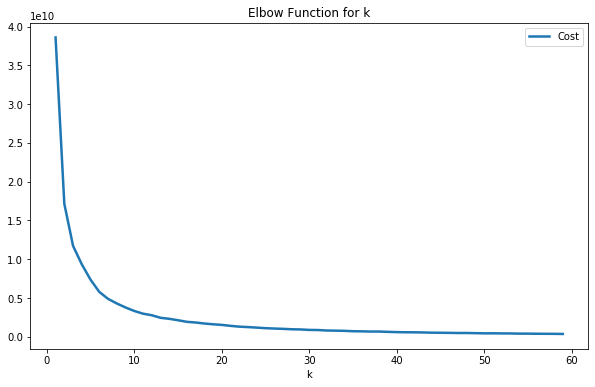

In [96]:
# plot

#df56.plot(x="District", y=["Sum of Population", "Sum of Households"], figsize = (14,9), kind="bar", title='Population and Household Count vs Districts')
#plot.xlabel("Value of K")
#plot.ylabel("Squared Error (Cost)")
#plot.grid()
#plot.show()
#cost = pd.DataFrame(cost)
#cost['k'] = range(1,60)
#cost.columns = ('Cost','k')
#print(cost)
cost.plot(x='k', y='Cost', figsize=(10,6), title='Elbow Function for k', linewidth=2.5)
plot.show()


#### Even though the curve flattens at 40 clusters, we would be using 10 clusters for the results to be understandable

#### Adding latitude and longitude for map plotting

In [26]:
# set number of clusters
from sklearn.cluster import KMeans
kclusters = 10
london_grouped_clustering = london_grouped_3.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)
# run k-means clustering
# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 6, 5, 8, 4, 9, 4, 9, 3, 3, 1, 5, 0, 4, 6, 2, 4, 8, 6, 3, 6, 5,
       6, 0, 8, 5, 1, 6, 0, 0, 6, 4, 3, 9, 3, 1, 8, 8, 4, 0, 5, 9, 4, 4,
       9, 0, 3, 4, 9, 4, 0, 3, 4, 1, 0, 9, 1, 8, 6, 5, 4, 8, 4, 4, 0, 5,
       9, 2, 2, 8, 3, 4, 5, 9, 0, 3, 4, 5, 6, 5, 9, 0, 4, 4, 6, 3, 9, 1,
       6, 1, 9, 1, 8, 6, 5, 1, 9, 8, 8, 9, 9, 1, 9, 1, 4, 0, 4, 3, 0, 6,
       9, 1, 4, 3, 3, 8, 8, 0, 9, 0, 0, 0, 3, 1, 4, 8, 9, 4, 5, 5, 9, 9,
       0, 3, 5, 0, 2, 2, 8, 1, 9, 8, 4, 4, 1, 0, 0, 8, 8, 4, 6, 7, 5, 6,
       4, 5, 5, 0, 1, 0, 4, 5, 3, 3, 4, 4, 1, 0, 0, 0, 1, 8, 6, 8, 0, 9,
       9, 8, 1, 4, 5, 4, 0, 8, 5, 5, 9, 7, 0, 5, 4, 9, 1, 8, 4, 0, 0, 0,
       9, 0, 5, 4, 6, 8, 0, 8, 6, 8, 1, 0, 0, 5, 0, 4, 0, 6, 6, 5, 6, 0,
       5, 0, 8, 9, 9, 5, 4, 4, 9, 9, 0, 1, 6, 1, 1, 9, 0, 2, 0, 0, 6, 4,
       0, 9, 4, 4, 0, 9, 9, 6, 0, 8, 0, 8, 9, 5, 9, 0, 0, 6, 9, 8, 7, 5,
       5, 4, 9, 0, 1, 6, 3, 5, 4, 0, 4, 0, 1, 4, 0, 4, 3, 6, 5, 6, 6, 9,
       9, 9, 5, 5, 6, 6, 5, 4, 0, 9, 2, 0, 8, 4, 0,

In [27]:
london_grouped_3['Cluster Label'] = kmeans.labels_
london_grouped_3 = pd.merge(london_grouped_3, df1[['Neighborhood','Average of Latitude','Average of Longitude']])
london_grouped_3

,Neighborhood,African,Anglo American,Asian,Continental European,Latin American,Middle Eastern,South Asian,Sum of Population,Average of Distance to station,Average of income,Count of Likes,Cluster Label,Average of Latitude,Average of Longitude
0,Abbey,0.4,0.400000,0.200000,0.000000,0.0,0.000000,0.000000,23016,0.359000,58431.05023,20.400000,1,51.476602,-0.058257
1,Abbey Road,0.0,0.333333,0.000000,0.166667,0.0,0.500000,0.000000,11091,0.348642,58690.76923,13.333333,6,51.534391,-0.178132
2,Abbey Wood,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,15684,0.660415,44023.42007,2.000000,5,51.490936,0.113496
3,Abingdon,0.0,0.346154,0.230769,0.230769,0.0,0.153846,0.038462,9644,0.467441,66320.00000,54.115385,8,51.497355,-0.196444
4,Acton Central,0.0,0.666667,0.000000,0.000000,0.0,0.000000,0.333333,15424,0.383761,51656.00000,3.333333,4,51.513191,-0.269339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,Woolwich Common,0.0,0.000000,0.333333,0.000000,0.0,0.333333,0.333333,16641,0.853287,42761.16505,1.666667,5,51.482835,0.066815
495,Woolwich Riverside,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,18970,0.395885,49334.09091,6.000000,4,51.491214,0.057531
496,Worcester Park,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,11605,0.914041,59000.00000,0.000000,6,51.379729,-0.233406
497,Wormholt and White City,0.0,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,13294,0.672493,48223.56322,10.000000,0,51.510975,-0.238036


#### Since results aren't very readable here, exportng the output to CSV File

In [ ]:
#df1.to_csv('df1.csv')
#london_grouped_3.to_csv('london_grouped_3.csv')

#### Drawing a map of the clusters over London

In [28]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_grouped_3['Average of Latitude'], london_grouped_3['Average of Longitude'], london_grouped_3['Neighborhood'], london_grouped_3['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    #print(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Visualizing Cluster Labels

In [29]:
result_comparison = london_grouped_3[london_grouped_3['Cluster Label']==0].mean().to_frame()
result_comparison['1'] = london_grouped_3[london_grouped_3['Cluster Label']==1].mean().to_frame()
result_comparison['2'] = london_grouped_3[london_grouped_3['Cluster Label']==2].mean().to_frame()
result_comparison['3'] = london_grouped_3[london_grouped_3['Cluster Label']==3].mean().to_frame()
result_comparison['4'] = london_grouped_3[london_grouped_3['Cluster Label']==4].mean().to_frame()
result_comparison['5'] = london_grouped_3[london_grouped_3['Cluster Label']==5].mean().to_frame()
result_comparison['6'] = london_grouped_3[london_grouped_3['Cluster Label']==6].mean().to_frame()
result_comparison['7'] = london_grouped_3[london_grouped_3['Cluster Label']==7].mean().to_frame()
result_comparison['8'] = london_grouped_3[london_grouped_3['Cluster Label']==8].mean().to_frame()
result_comparison['9'] = london_grouped_3[london_grouped_3['Cluster Label']==9].mean().to_frame()
#result_comparison['10'] = london_grouped_3[london_grouped_3['Cluster Label']==10].mean().to_frame()
#result_comparison['11'] = london_grouped_3[london_grouped_3['Cluster Label']==11].mean().to_frame()
#result_comparison['12'] = london_grouped_3[london_grouped_3['Cluster Label']==12].mean().to_frame()
#result_comparison['13'] = london_grouped_3[london_grouped_3['Cluster Label']==13].mean().to_frame()
#result_comparison['14'] = london_grouped_3[london_grouped_3['Cluster Label']==14].mean().to_frame()
#result_comparison['15'] = london_grouped_3[london_grouped_3['Cluster Label']==15].mean().to_frame()
#result_comparison['16'] = london_grouped_3[london_grouped_3['Cluster Label']==16].mean().to_frame()
#result_comparison['17'] = london_grouped_3[london_grouped_3['Cluster Label']==17].mean().to_frame()
#result_comparison['18'] = london_grouped_3[london_grouped_3['Cluster Label']==18].mean().to_frame()
#result_comparison['19'] = london_grouped_3[london_grouped_3['Cluster Label']==19].mean().to_frame()
result_comparison

,0,1,2,3,4,5,6,7,8,9
African,0.011680,0.015312,0.000000,0.000000,0.014577,0.004113,0.003346,0.000000,0.001359,0.003755
Anglo American,0.460284,0.376418,0.312967,0.341883,0.451720,0.531736,0.293143,0.381548,0.373057,0.449408
Asian,0.176441,0.144392,0.276385,0.212030,0.128199,0.116769,0.219955,0.173082,0.252820,0.161573
Continental European,0.122887,0.235432,0.293310,0.269349,0.135804,0.106732,0.222267,0.129762,0.254856,0.186110
Latin American,0.011910,0.027642,0.015910,0.074554,0.013073,0.021537,0.024774,0.040741,0.010002,0.012408
Middle Eastern,0.073696,0.088864,0.030325,0.062752,0.088418,0.103956,0.085526,0.095899,0.044864,0.077866
South Asian,0.143101,0.111940,0.071104,0.039433,0.168210,0.115159,0.150989,0.178968,0.063042,0.108881
Sum of Population,13618.287129,16251.658537,11587.450000,299.791667,15159.263158,13753.654545,10772.492063,26843.888889,11637.456522,11107.875000
Average of Distance to station,0.701911,0.632917,0.509042,0.195072,0.650835,0.761378,0.563038,0.523406,0.563333,0.624577
Average of income,48175.677736,59001.791418,71593.542020,65400.000000,52762.199132,42670.289998,59273.506078,51143.928001,65061.172325,53716.713038


#### Population shouldn't be averaged, hence taking a sum of population and replacing that index in the original dataframe

In [30]:
sop = london_grouped_3[london_grouped_3['Cluster Label']==0].sum().to_frame()
sop['1'] = london_grouped_3[london_grouped_3['Cluster Label']==1].sum().to_frame()
sop['2'] = london_grouped_3[london_grouped_3['Cluster Label']==2].sum().to_frame()
sop['3'] = london_grouped_3[london_grouped_3['Cluster Label']==3].sum().to_frame()
sop['4'] = london_grouped_3[london_grouped_3['Cluster Label']==4].sum().to_frame()
sop['5'] = london_grouped_3[london_grouped_3['Cluster Label']==5].sum().to_frame()
sop['6'] = london_grouped_3[london_grouped_3['Cluster Label']==6].sum().to_frame()
sop['7'] = london_grouped_3[london_grouped_3['Cluster Label']==7].sum().to_frame()
sop['8'] = london_grouped_3[london_grouped_3['Cluster Label']==8].sum().to_frame()
sop['9'] = london_grouped_3[london_grouped_3['Cluster Label']==9].sum().to_frame()
sop.loc['Sum of Population']

0    1375447
1     666318
2     231749
3       7195
4    1152104
5     756451
6     678667
7     241595
8     535323
9     710904
Name: Sum of Population, dtype: object

In [31]:
result_comparison.loc['Sum of Population'] = sop.loc['Sum of Population']

#### Final Result

In [ ]:
result_comparison
result_comparison.to_csv('result_comparison3.csv')